<a href="https://colab.research.google.com/github/Smit-2907/Practise/blob/main/somethin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers torch pandas matplotlib wordcloud

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 30, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 30, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 30, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


                                                text sentiment     score  \
0  The new policy is very helpful and improves tr...  POSITIVE  0.999768   
1  I am not happy with the changes, they are conf...  NEGATIVE  0.999493   
2  The proposed law will improve safety in the wo...  POSITIVE  0.991158   

                                             summary  
0  "The new policy is very helpful and improves t...  
1  "I am not happy with the changes, they are con...  
2  The proposed law will improve safety in the wo...  


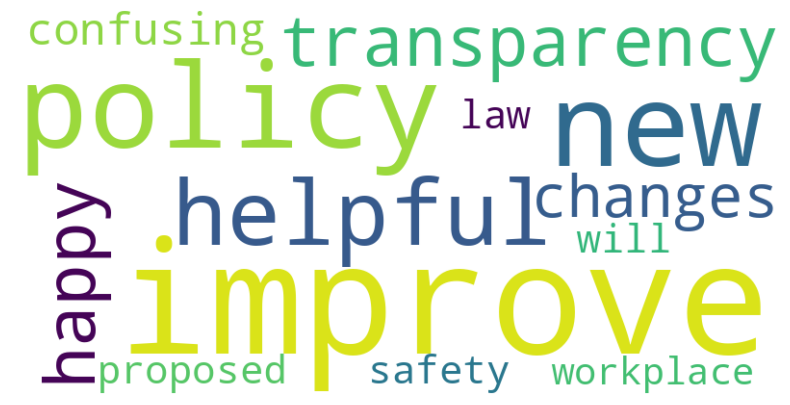

In [2]:
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Initialize pipelines
sentiment_pipeline = pipeline("sentiment-analysis")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Store feedback data
feedback_store = []

def process_feedback(text):
    # Sentiment
    sentiment = sentiment_pipeline(text)[0]

    # Summary (shorten to 30 words max)
    summary = summarizer(text, max_length=30, min_length=5, do_sample=False)[0]['summary_text']

    # Save to store
    feedback_store.append({
        "text": text,
        "sentiment": sentiment['label'],
        "score": sentiment['score'],
        "summary": summary
    })

def generate_wordcloud():
    all_text = " ".join([fb["text"] for fb in feedback_store])
    wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# ---- Example run ----
process_feedback("The new policy is very helpful and improves transparency.")
process_feedback("I am not happy with the changes, they are confusing.")
process_feedback("The proposed law will improve safety in the workplace.")

# Show stored feedback
df = pd.DataFrame(feedback_store)
print(df)

# Generate wordcloud
generate_wordcloud()
